# Usage of pretrained model (VGG16)

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

import tensorflow as tf
tf.enable_eager_execution()

os.environ["CUDA_VISIBLE_DEVICES"]="0"

### Usage `VGG16`
* [code link](https://github.com/keras-team/keras-applications/blob/master/keras_applications/vgg16.py)
* [document link](https://keras.io/applications/#vgg16)

```python
def VGG16(include_top=True,
          weights='imagenet',
          input_tensor=None,
          input_shape=None,
          pooling=None,
          classes=1000,
          **kwargs):
    """Instantiates the VGG16 architecture.
    Optionally loads weights pre-trained on ImageNet.
    Note that the data format convention used by the model is
    the one specified in your Keras config at `~/.keras/keras.json`.
    # Arguments
        include_top: whether to include the 3 fully-connected
            layers at the top of the network.
        weights: one of `None` (random initialization),
              'imagenet' (pre-training on ImageNet),
              or the path to the weights file to be loaded.
        input_tensor: optional Keras tensor
            (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is False (otherwise the input shape
            has to be `(224, 224, 3)`
            (with `channels_last` data format)
            or `(3, 224, 224)` (with `channels_first` data format).
            It should have exactly 3 input channels,
            and width and height should be no smaller than 32.
            E.g. `(200, 200, 3)` would be one valid value.
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional block.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional block, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is True, and
            if no `weights` argument is specified.
    # Returns
        A Keras model instance.
    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
    """
```

### General method (`include_top=True`) 

In [2]:
vgg16_1 = tf.keras.applications.VGG16()

In [3]:
vgg16_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
vgg16_2 = tf.keras.applications.VGG16(include_top=False,
                                      input_shape=(150, 150, 3))

In [5]:
vgg16_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

#### Read a image

In [6]:
def vgg_preprocessing(image):
  """image preprocessing

  Args:
    image (PIL image): image with shape [height, width, channels]
    
  Returns:
    image (np.float32): vgg preprocessed image with 4-rank tensor shape [1, height, width, channels] applied by mean_image_subtraction
  """
  norm_means = np.array([123.68, 116.779, 103.939])
  vgg_image_size = 224
  image = image.resize((vgg_image_size, vgg_image_size))
  image = np.asarray(image)
  image = image.astype(np.float32)
  image -= norm_means
  
  return image

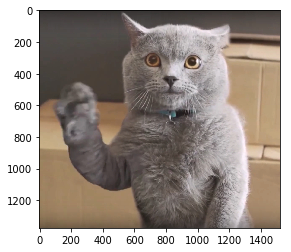

In [7]:
my_image = Image.open('../../input_data/cat2.jpg')
plt.imshow(my_image)

In [8]:
my_image = vgg_preprocessing(my_image)
my_image = np.expand_dims(my_image, axis=0)

### Inference `my_image` through VGG16

In [9]:
prediction = vgg16_1(my_image)

In [10]:
prediction.shape

TensorShape([Dimension(1), Dimension(1000)])

In [11]:
print('prediction index: {}'.format(tf.argmax(prediction, axis=1)[0]))

prediction index: 285


### Observe all activation maps

In [12]:
layer_outputs = [layer.output for layer in vgg16_1.layers[1:]]
for layer in layer_outputs:
  print(layer)

DeferredTensor('None', shape=(?, 224, 224, 64), dtype=float32)
DeferredTensor('None', shape=(?, 224, 224, 64), dtype=float32)
DeferredTensor('None', shape=(?, 112, 112, 64), dtype=float32)
DeferredTensor('None', shape=(?, 112, 112, 128), dtype=float32)
DeferredTensor('None', shape=(?, 112, 112, 128), dtype=float32)
DeferredTensor('None', shape=(?, 56, 56, 128), dtype=float32)
DeferredTensor('None', shape=(?, 56, 56, 256), dtype=float32)
DeferredTensor('None', shape=(?, 56, 56, 256), dtype=float32)
DeferredTensor('None', shape=(?, 56, 56, 256), dtype=float32)
DeferredTensor('None', shape=(?, 28, 28, 256), dtype=float32)
DeferredTensor('None', shape=(?, 28, 28, 512), dtype=float32)
DeferredTensor('None', shape=(?, 28, 28, 512), dtype=float32)
DeferredTensor('None', shape=(?, 28, 28, 512), dtype=float32)
DeferredTensor('None', shape=(?, 14, 14, 512), dtype=float32)
DeferredTensor('None', shape=(?, 14, 14, 512), dtype=float32)
DeferredTensor('None', shape=(?, 14, 14, 512), dtype=float32)
D

### Observe all training variables

In [13]:
for var in vgg16_1.variables:
  print(var.name)

block1_conv1/kernel:0
block1_conv1/bias:0
block1_conv2/kernel:0
block1_conv2/bias:0
block2_conv1/kernel:0
block2_conv1/bias:0
block2_conv2/kernel:0
block2_conv2/bias:0
block3_conv1/kernel:0
block3_conv1/bias:0
block3_conv2/kernel:0
block3_conv2/bias:0
block3_conv3/kernel:0
block3_conv3/bias:0
block4_conv1/kernel:0
block4_conv1/bias:0
block4_conv2/kernel:0
block4_conv2/bias:0
block4_conv3/kernel:0
block4_conv3/bias:0
block5_conv1/kernel:0
block5_conv1/bias:0
block5_conv2/kernel:0
block5_conv2/bias:0
block5_conv3/kernel:0
block5_conv3/bias:0
fc1/kernel:0
fc1/bias:0
fc2/kernel:0
fc2/bias:0
predictions/kernel:0
predictions/bias:0


In [14]:
vgg16_1.variables[0].shape

TensorShape([Dimension(3), Dimension(3), Dimension(3), Dimension(64)])

In [15]:
vgg16_1.layers[1].kernel.shape

TensorShape([Dimension(3), Dimension(3), Dimension(3), Dimension(64)])

In [16]:
vgg16_1.variables[0].numpy() == vgg16_1.layers[1].kernel.numpy()

array([[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]]],


       [[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
  

### Extract all activation maps (feature maps)

In [17]:
from tensorflow.keras import models

In [18]:
activation_model = models.Model(inputs=vgg16_1.input, outputs=layer_outputs)

In [19]:
activations = activation_model.predict(my_image)

In [20]:
conv1_1 = activations[0]
conv2_1 = activations[2]
conv3_2 = activations[6]
conv4_3 = activations[11]
conv5_3 = activations[15]

### Print feature maps

In [21]:
def print_all_feature_maps(layer, layer_name):
  """Print all feature maps
    This code is borrowed from "Deep Learning with Python" (by F. Chollet)
  
  Args:
    layer (4-rank Tensor): feature maps
    layer_name (string): name of feature maps
    
  Returns:
    print all feature maps
  """
  num_features = layer.shape[-1]
  size = layer.shape[1]
  images_per_row = 16
  for feature_map in range(num_features):
    num_cols = num_features // images_per_row
    display_grid = np.zeros((size * num_cols, images_per_row * size))

    for col in range(num_cols):
      for row in range(images_per_row):
        channel_image = layer[0,:,:,col * images_per_row + row]

        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')

        display_grid[col * size : (col + 1) * size,
                     row * size : (row + 1) * size] = channel_image

  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

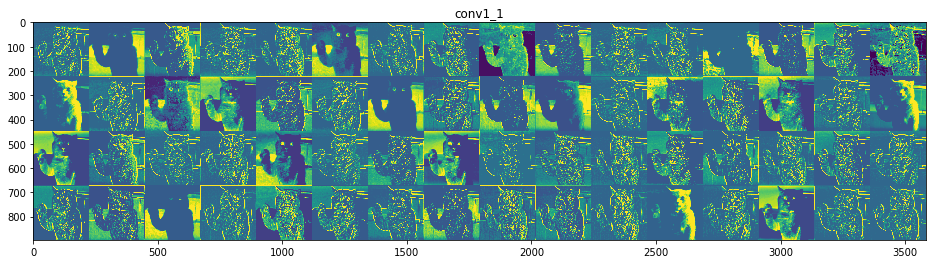

In [22]:
print_all_feature_maps(conv1_1, 'conv1_1')

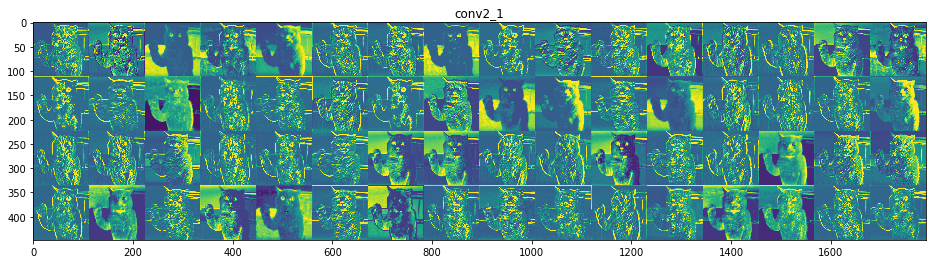

In [23]:
print_all_feature_maps(conv2_1, 'conv2_1')

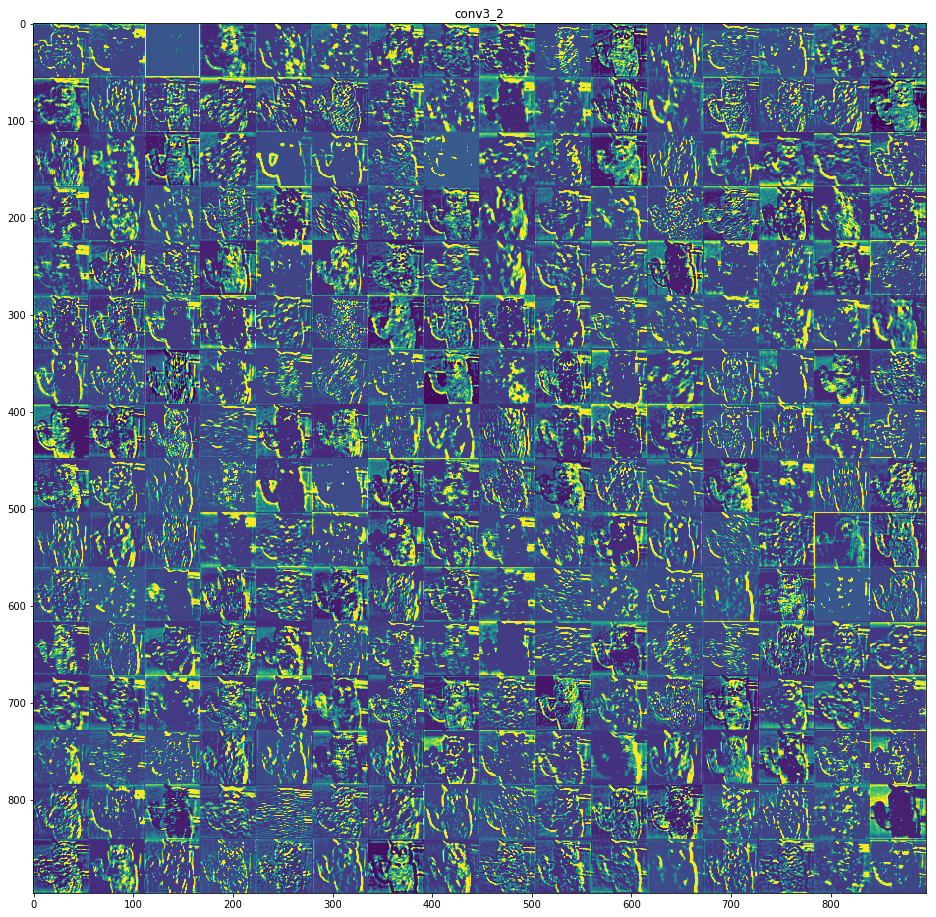

In [24]:
print_all_feature_maps(conv3_2, 'conv3_2')

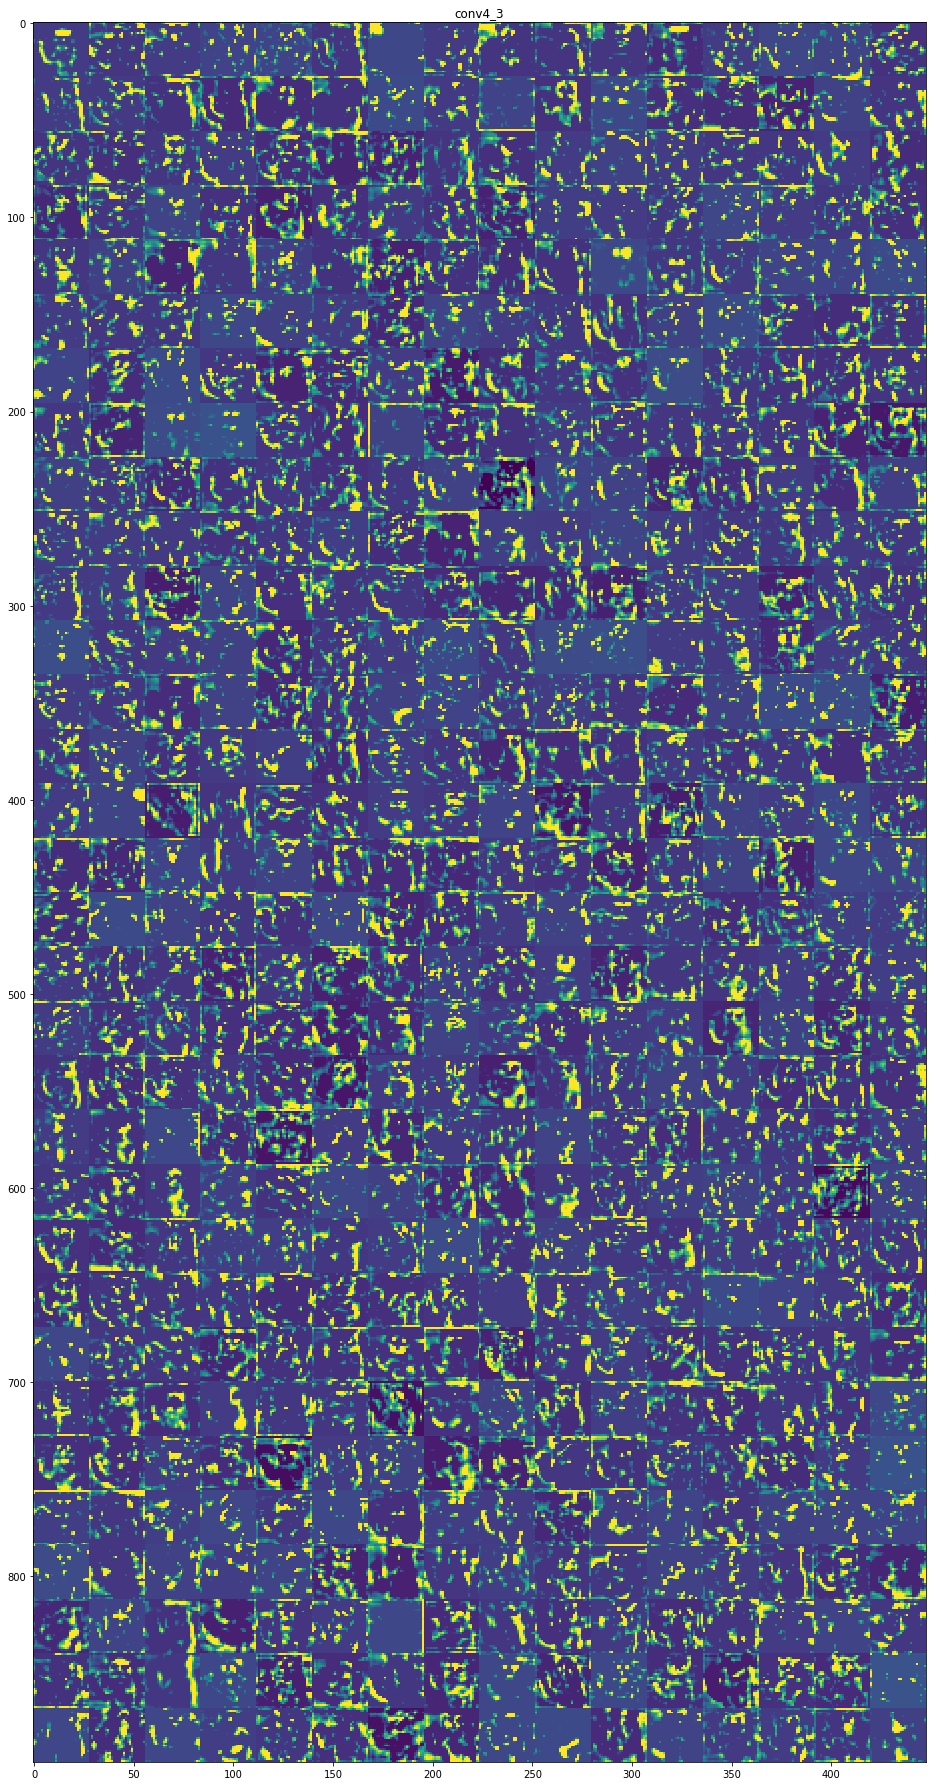

In [25]:
print_all_feature_maps(conv4_3, 'conv4_3')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


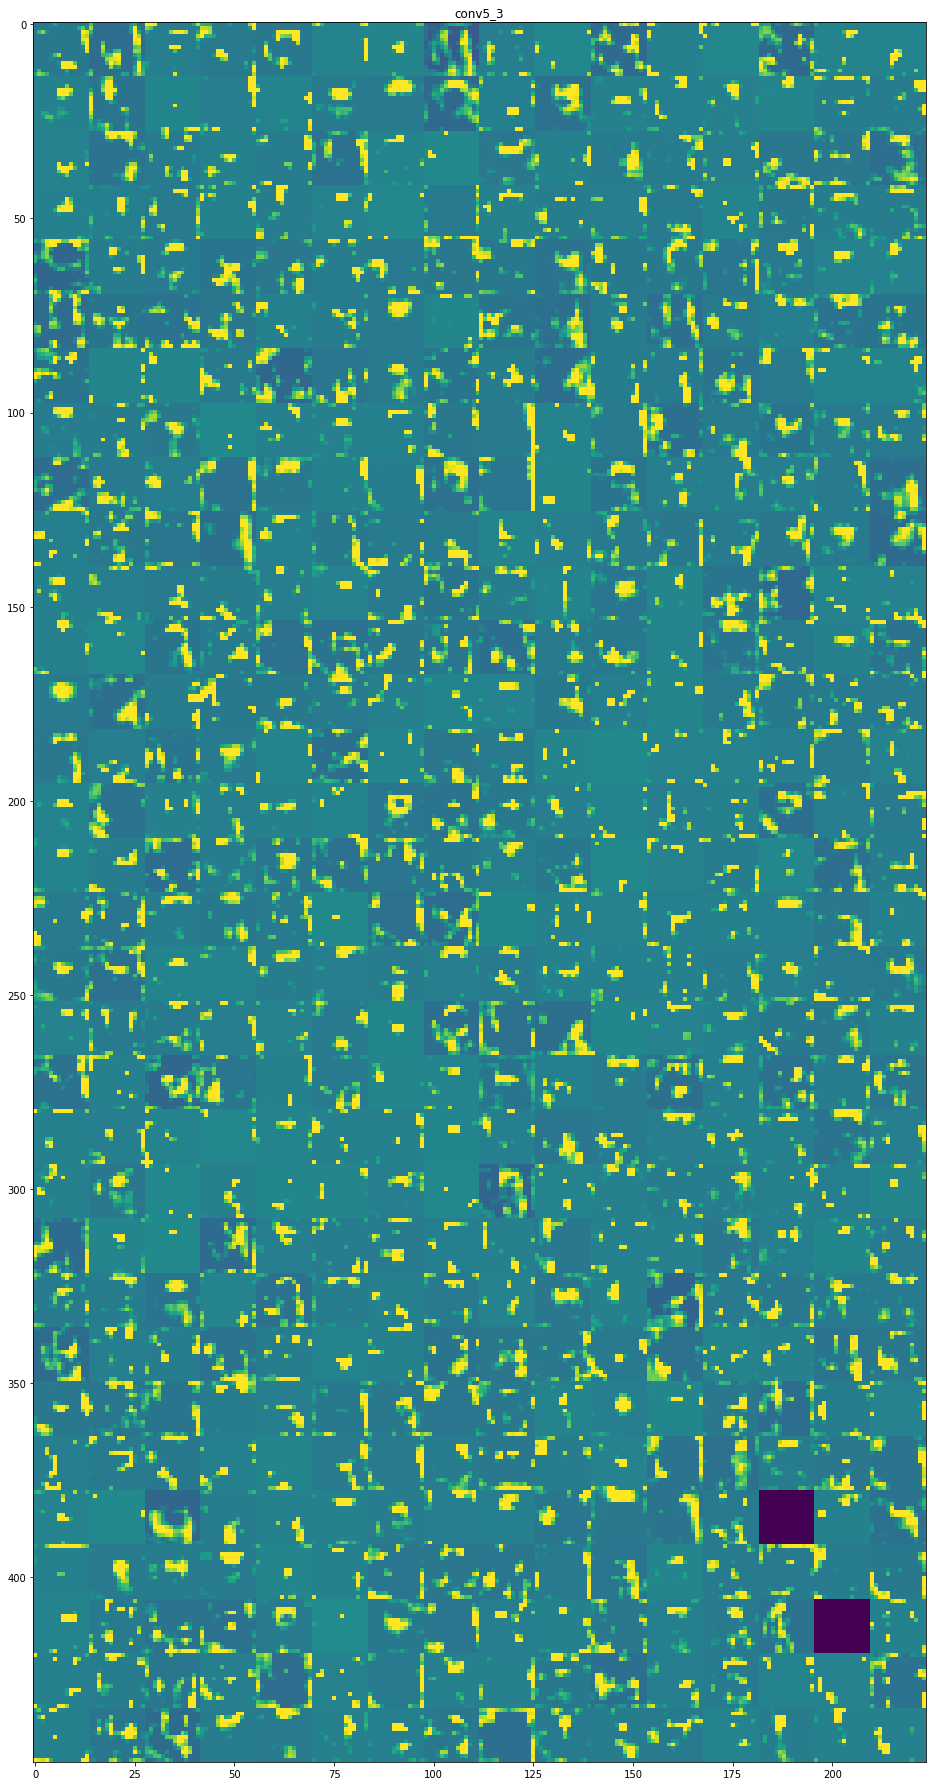

In [26]:
print_all_feature_maps(conv5_3, 'conv5_3')